In [2]:
pip install seaborn



     -------------------------------------- 293.3/293.3 kB 2.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [5]:
#dataset 
df = pd.read_csv('Train-set.csv')

In [7]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Prepocessing


In [9]:
#unique value check
df.select_dtypes(include='object').nunique()

ProductID       1559
FatContent         5
ProductType       16
OutletID          10
OutletSize         3
LocationType       3
OutletType         4
dtype: int64

# Data Analysis

In [19]:
#  categorical variables that we need to plot
cat_vars = ['FatContent', 'ProductType', 'OutletID', 'OutletSize', 'LocationType', 
            'OutletType']


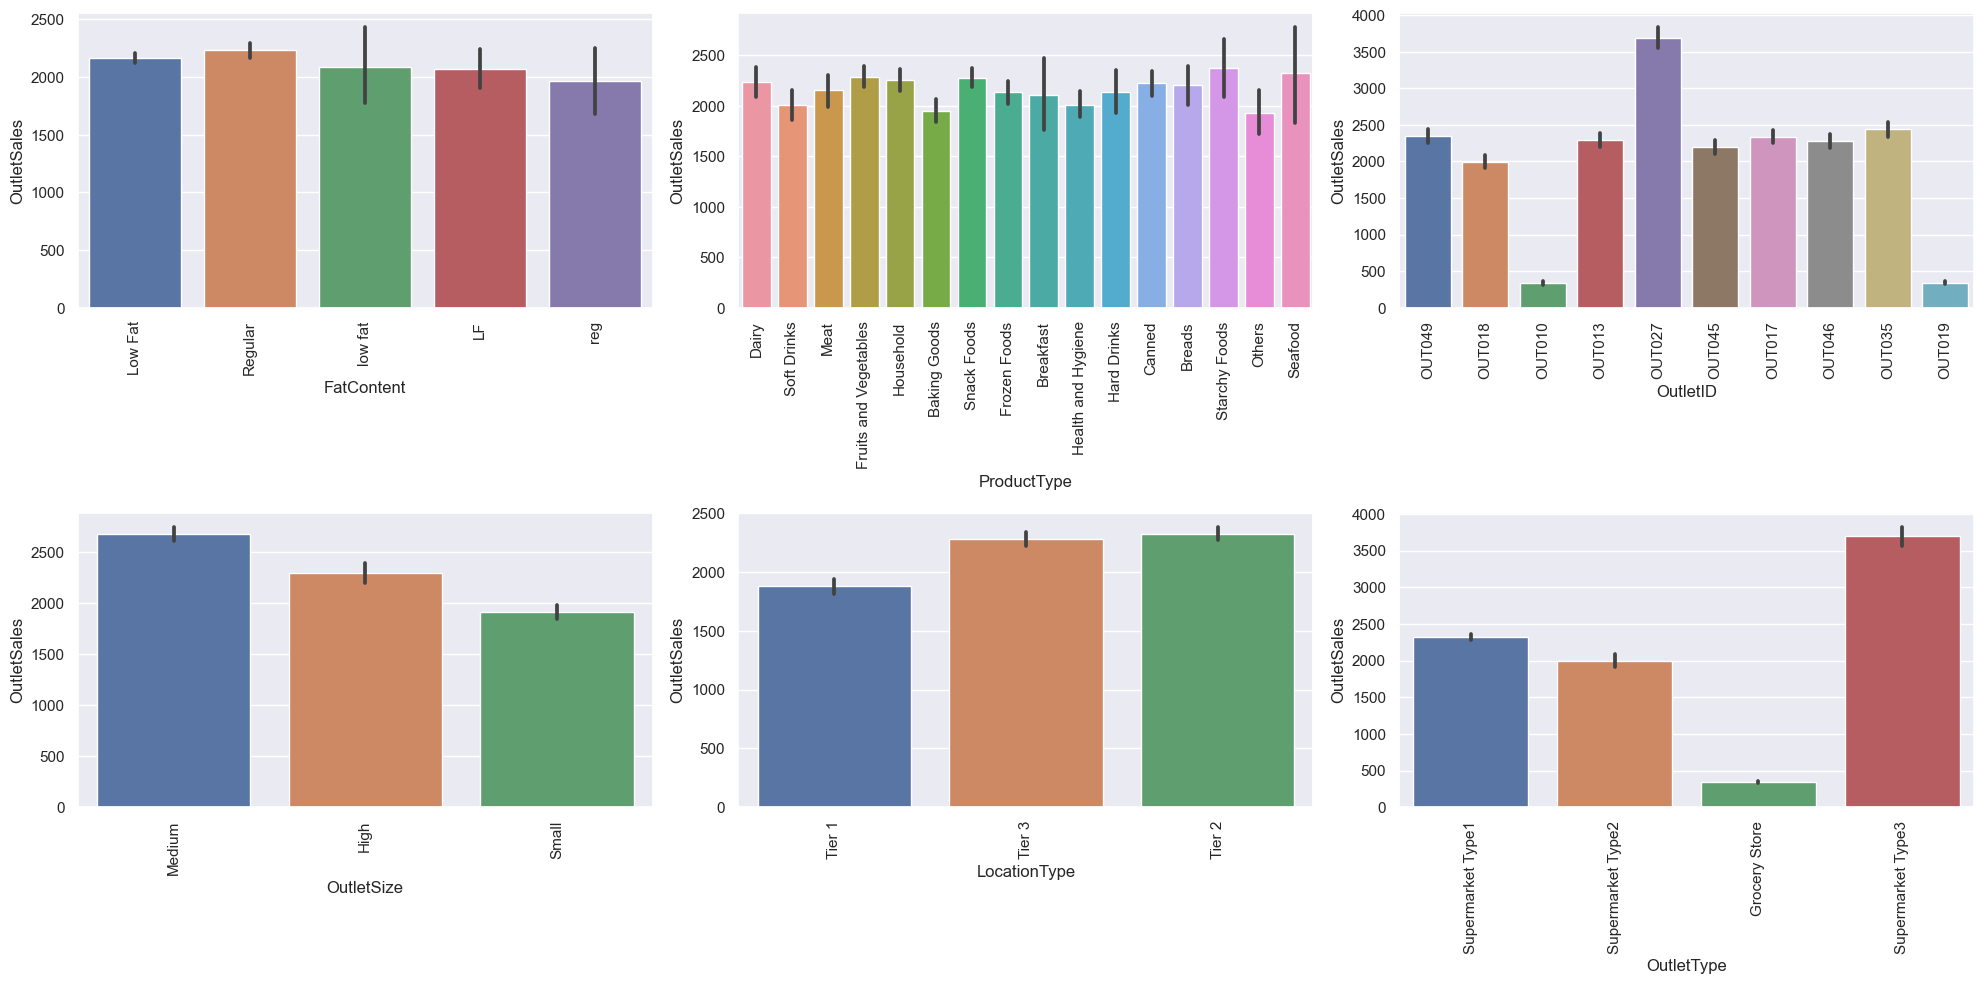

In [25]:
# creating a figure with subplots and a barplot for each cat_value
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='OutletSales', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
 # adjusting spacing 
fig.tight_layout()
plt.show()


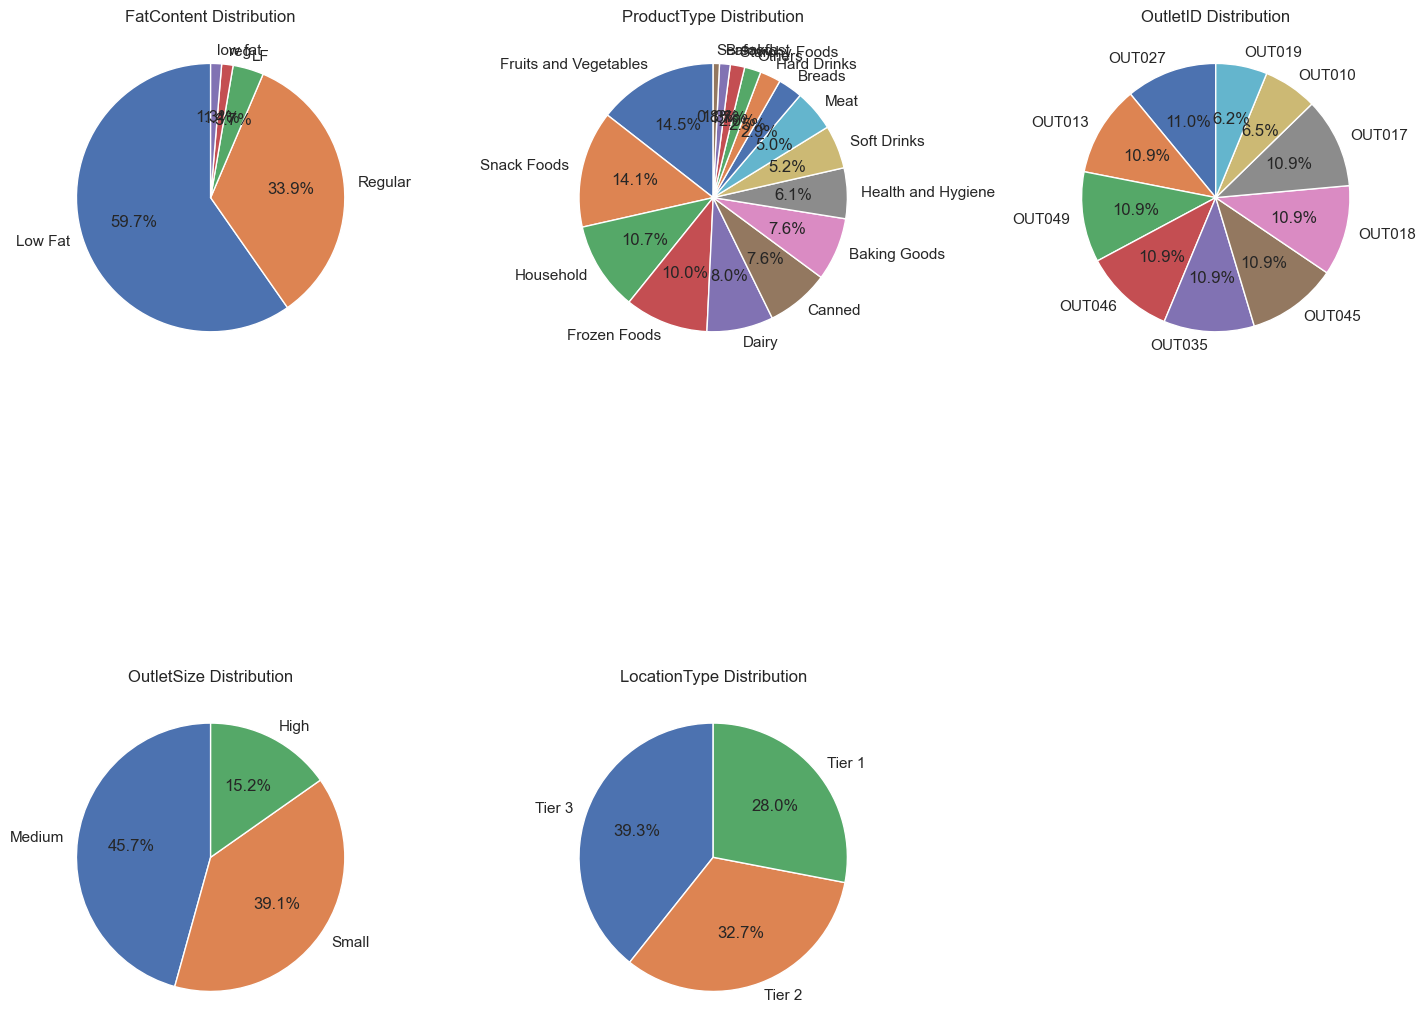

In [27]:
# plotting new a figure and axes(pie chart)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
       
        cat_counts = df[var].value_counts()
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing
fig.tight_layout()
fig.delaxes(axs[1][2])


plt.show()

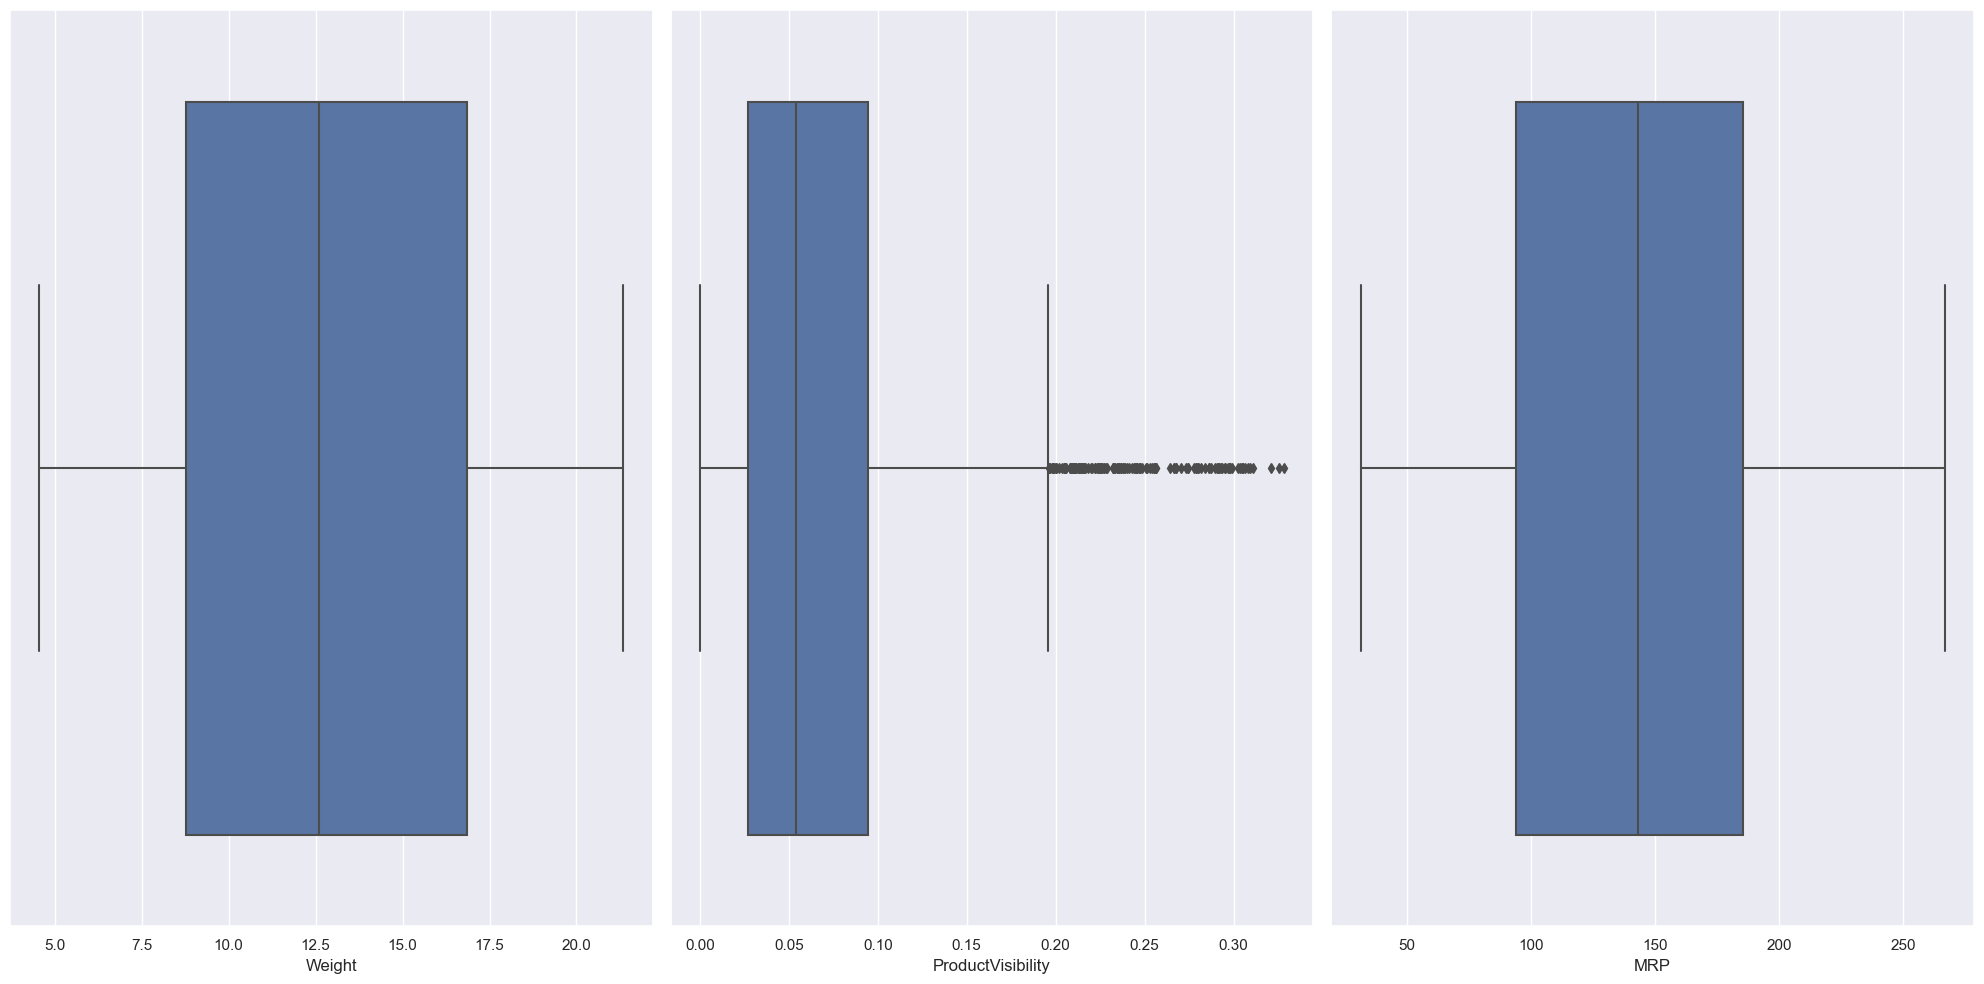

In [28]:
num_vars = ['Weight', 'ProductVisibility', 'MRP']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

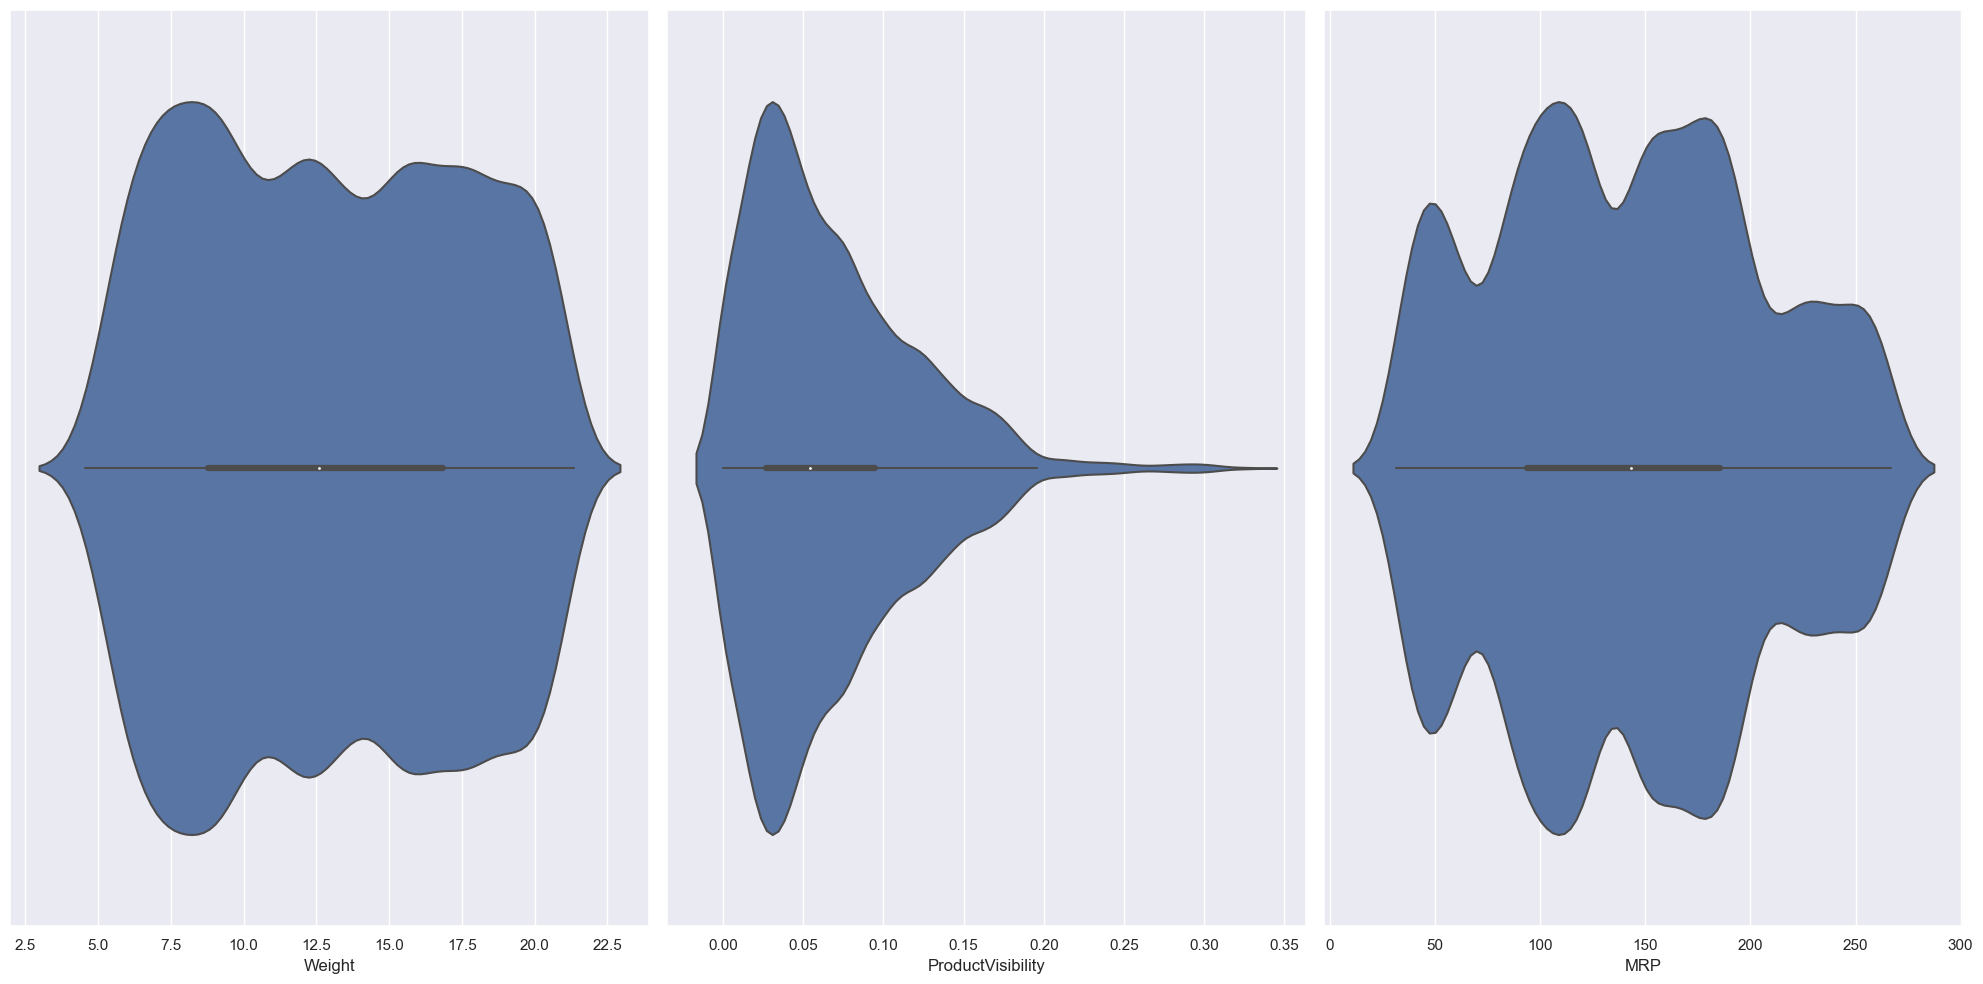

In [30]:
num_vars = ['Weight', 'ProductVisibility', 'MRP']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

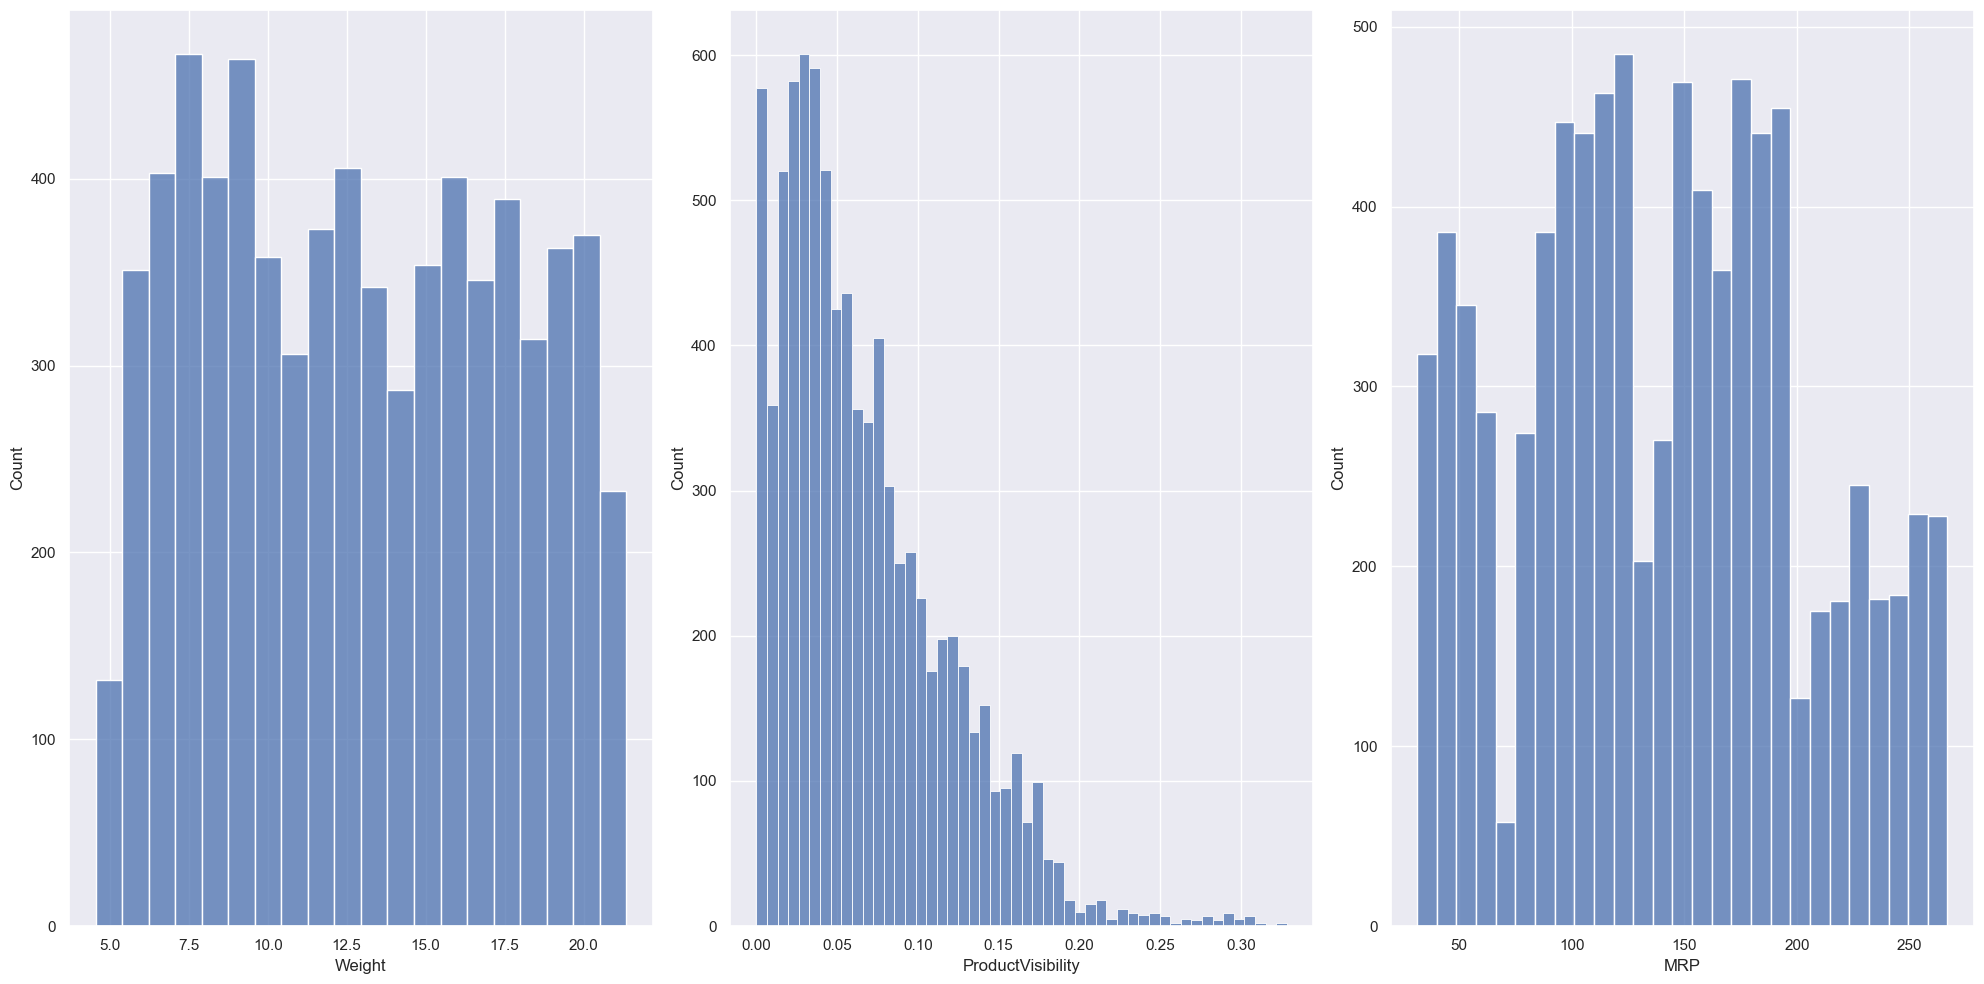

In [32]:
num_vars = ['Weight', 'ProductVisibility', 'MRP']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

<AxesSubplot: xlabel='EstablishmentYear', ylabel='OutletSales'>

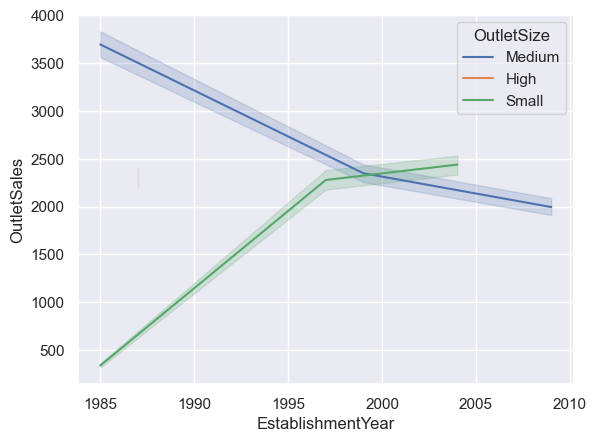

In [33]:
sns.lineplot(data=df, x="EstablishmentYear", y="OutletSales", hue="OutletSize")

<AxesSubplot: xlabel='EstablishmentYear', ylabel='OutletSales'>

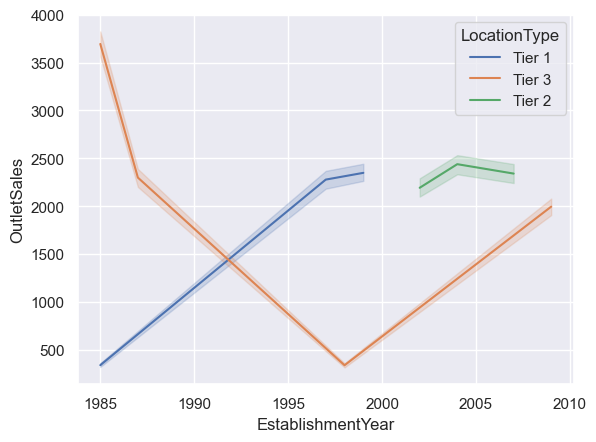

In [34]:
sns.lineplot(data=df, x="EstablishmentYear", y="OutletSales", hue="LocationType")

<AxesSubplot: xlabel='EstablishmentYear', ylabel='OutletSales'>

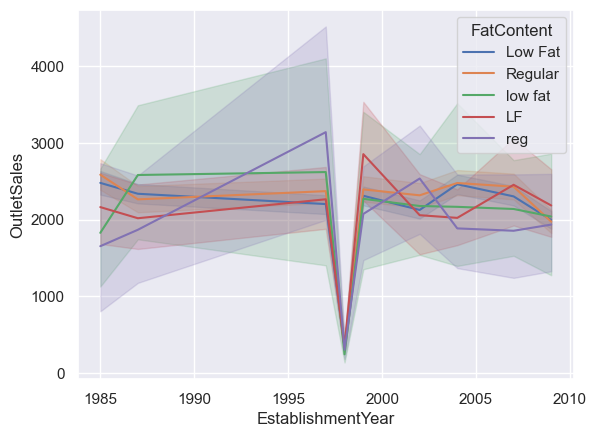

In [35]:
sns.lineplot(data=df, x="EstablishmentYear", y="OutletSales", hue="FatContent")

<AxesSubplot: xlabel='EstablishmentYear', ylabel='OutletSales'>

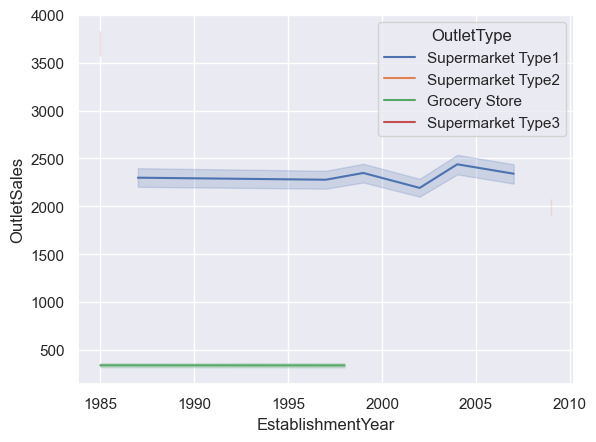

In [36]:
sns.lineplot(data=df, x="EstablishmentYear", y="OutletSales", hue="OutletType")

# Preprocessing



In [37]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

OutletSize    28.276428
Weight        17.165317
dtype: float64

In [38]:
df.shape

(8523, 11)

In [39]:
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [40]:
unique_sizes_train3 = df.groupby('OutletType')['OutletSize'].unique()
unique_sizes_train3

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [41]:
# filling null value in OutletSize where OutletType == Grocery Store with 'Small' value
df.loc[(df['OutletType'] == 'Grocery Store') & (df['OutletSize'].isna()), 'OutletSize'] = 'Small'

In [42]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

OutletSize    21.764637
dtype: float64

In [43]:
df.dropna(subset=['OutletSize'], inplace=True)
df.shape

(6668, 11)

In [44]:
df.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Label encoding the data types

In [48]:
#loop over each column in the dataframe
for col in df.select_dtypes(include=['object']).columns:
   
 print(f"{col}: {df[col].unique()}")

FatContent: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
ProductType: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Breakfast' 'Health and Hygiene'
 'Hard Drinks' 'Frozen Foods' 'Canned' 'Starchy Foods' 'Others' 'Breads'
 'Seafood']
OutletID: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT046' 'OUT035' 'OUT019']
OutletSize: ['Medium' 'Small' 'High']
LocationType: ['Tier 1' 'Tier 3' 'Tier 2']
OutletType: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [49]:
from sklearn import preprocessing

# Loop over each column in the DataFrame(datatype is  object)
for col in df.select_dtypes(include=['object']).columns:
    
    # Initializing a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fiting the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transforming using the encoder and printing the values
    df[col] = label_encoder.transform(df[col])
    print(f"{col}: {df[col].unique()}")

FatContent: [1 2 3 0 4]
ProductType: [ 4 14 10  6  9  0 13  2  8  7  5  3 15 11  1 12]
OutletID: [7 2 0 1 4 6 5 3]
OutletSize: [1 2 0]
LocationType: [0 2 1]
OutletType: [1 2 0 3]


# Removing outlier(using IQR)

In [51]:
df.shape

(6668, 11)

In [52]:
# specifying the columns to remove outliers from dataframe
column_names = ['ProductVisibility']

# removing outliers for each selected column using the IQR method
for column_name in column_names:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]



In [53]:
df.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,1,0.016047,4,249.8092,7,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,7,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [54]:
df.shape

(6535, 11)

# Train_test split


In [55]:
X = df.drop('OutletSales', axis=1)
y = df['OutletSales']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Regression model using Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

rf = RandomForestRegressor(random_state=0, max_depth=5, min_samples_split=2, min_samples_leaf=4, 
                           max_features='auto')
rf.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])